In [38]:
import os
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from core.result_reader import combine_run_experiments, combine_run_training_logs

RESULT_DIR = "../_report_results"
#dirs = os.listdir(RESULT_DIR)
#dirs = sorted(dirs)
#print(dirs)
#selected_dir = "220410_004903" , "220419_005850"
selected_dir = RESULT_DIR
print(selected_dir)

../_report_results


In [39]:
df = combine_run_experiments(RESULT_DIR)

for col in ["train", "test", "val"]:
    df[f"{col}_err"] = 1 - df[f"{col}_acc"]

df["hour_trained"] = df["train_time"] / 3600
df["model_name"] = df.exp_name.apply(lambda x: x.split("_")[0])
df["model_size"] = df.exp_name.apply(lambda x: int(x.split("_")[1]))
df["batch_size"] = df.exp_name.apply(lambda x: int(x.split("_")[2]))
df["learning_rate"] = df.exp_name.apply(lambda x: float(x.split("_")[3]))

In [40]:
cols = [
    "model_name", 
    "model_size", 
    "batch_size", 
    "learning_rate", 
    "train_err", 
    "val_err", 
    "val_acc",
    "test_err",
    "test_acc",
    "hour_trained"
]

### ResNet vs DsNet vs DenseNet

In [41]:
# Res vs Ds vs Dense
df2 = df[(df["model_name"].apply(lambda x: "Ds" in x))].sort_values(["model_size", "hour_trained"])[cols]
#df2 = df2[df2.model_size != 12]
df3 = df2.reset_index().drop("index", axis=1)
df3

,model_name,model_size,batch_size,learning_rate,train_err,val_err,val_acc,test_err,test_acc,hour_trained
0,DsNet,3,128,0.10,0.16444,0.3546,0.6454,0.3400,0.6600,0.847004
1,DsNet,3,128,0.01,0.21090,0.3844,0.6156,0.3768,0.6232,0.847780
2,DsNet,3,32,0.01,0.20172,0.3478,0.6522,0.3376,0.6624,1.225818
3,DsNet,3,32,0.10,0.20428,0.3252,0.6748,0.3416,0.6584,1.234748
4,DsNet,8,128,0.01,0.07798,0.3606,0.6394,0.3482,0.6518,1.977722
5,DsNet,8,128,0.10,0.04758,0.3218,0.6782,0.3048,0.6952,1.989258
6,DsNet,8,32,0.01,0.08188,0.3370,0.6630,0.3254,0.6746,3.118331
7,DsNet,8,32,0.10,0.09476,0.3044,0.6956,0.3016,0.6984,3.129933
8,DsNet,12,32,0.10,0.05894,0.2958,0.7042,0.2854,0.7146,4.955379


Text(0.5, 1.0, 'CIFAR-100')

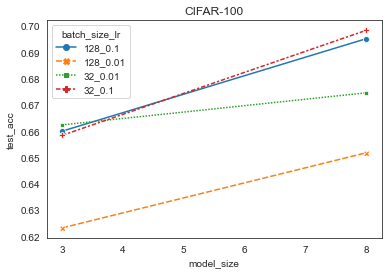

In [17]:
sns.set_style("white")
df3["batch_size_lr"] = df3["batch_size"].apply(str) + "_" + df3["learning_rate"].apply(str)
df4 = df3[df3["model_size"] < 12]
sns.lineplot(data=df4, x="model_size", y="test_acc", hue="batch_size_lr", style="batch_size_lr", markers=True)
plt.title("CIFAR-100")

### Training Curves

In [31]:
df3 = combine_run_training_logs(RESULT_DIR)
df3["fold"] = df3["fold"].apply(int)
df3["train_acc"] = df3["train_acc"].apply(float)
df3["val_acc"] = df3["val_acc"].apply(float)
df4 = df3[df3["exp_name"].apply(lambda x: "DsNet" in x)]
df4

,train_time,train_loss,train_acc,val_loss,val_acc,epoch,fold,exp_name
0,178.35565,3.92981,0.09420,3.62105,0.1386,0,0,DsNet_12_32_0.1
1,177.93823,3.26853,0.20188,3.17067,0.2270,1,0,DsNet_12_32_0.1
2,177.96395,2.85468,0.27664,2.98135,0.2646,2,0,DsNet_12_32_0.1
3,177.50706,2.55391,0.33642,2.84534,0.3040,3,0,DsNet_12_32_0.1
4,177.59319,2.32951,0.38376,2.36444,0.3900,4,0,DsNet_12_32_0.1
...,...,...,...,...,...,...,...,...
95,43.88725,0.65623,0.80106,1.28115,0.6516,95,0,DsNet_3_32_0.01
96,43.79846,0.66091,0.80000,1.29623,0.6476,96,0,DsNet_3_32_0.01
97,43.95702,0.65495,0.80080,1.27806,0.6492,97,0,DsNet_3_32_0.01
98,43.92240,0.65395,0.80032,1.27987,0.6508,98,0,DsNet_3_32_0.01


In [32]:
# Graph
def graph_training_logs(exp_name: str, df):    

    df = df[df["exp_name"].apply(lambda x: exp_name in x)]

    # A bit hacky
    # df3["exp_name"] = df3["exp_name"] + "_train"
    # sns_pp = sns.lineplot(data=df3[df3["fold"] == 0],
    #                       x="epoch", y="train_acc", hue="exp_name")

    df["exp_name"] = df["exp_name"] + "_val"
    sns_pp = sns.lineplot(data=df[df["fold"] == 0],
                          x="epoch", y="val_acc", hue="exp_name")

    plt.title("CIFAR-100")

/var/folders/m2/659rrfsx63db1lpvyxrqtf9h0000gn/T/ipykernel_17340/3041442452.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["exp_name"] = df["exp_name"] + "_val"


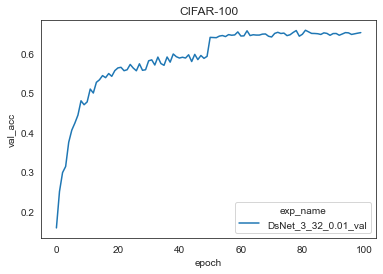

In [36]:
graph_training_logs("DsNet_3_32_0.01", df4)

/var/folders/m2/659rrfsx63db1lpvyxrqtf9h0000gn/T/ipykernel_17340/3041442452.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["exp_name"] = df["exp_name"] + "_val"
/Users/time/miniconda/envs/python39/lib/python3.9/site-packages/seaborn/_core.py:1057: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_col.loc[orig.index] = pd.to_numeric(axis.convert_units(orig))


ValueError: cannot reindex on an axis with duplicate labels

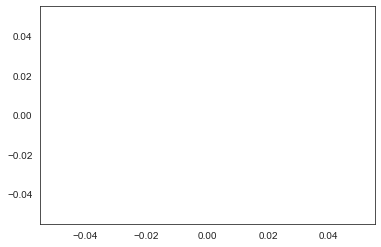

In [37]:
graph_training_logs("Net_8_32_0.1", df3)

/var/folders/m2/659rrfsx63db1lpvyxrqtf9h0000gn/T/ipykernel_17222/3041442452.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["exp_name"] = df["exp_name"] + "_val"


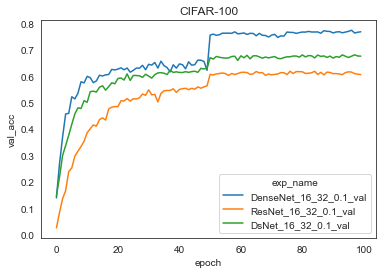

In [14]:
graph_training_logs("Net_16_32_0.1", df3)

/var/folders/m2/659rrfsx63db1lpvyxrqtf9h0000gn/T/ipykernel_17222/3041442452.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["exp_name"] = df["exp_name"] + "_val"


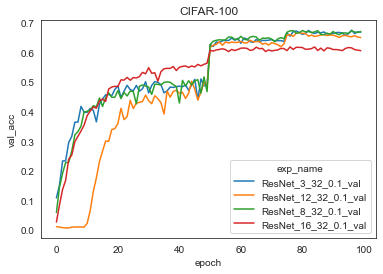

In [15]:
graph_training_logs("ResNet_", df3)

/var/folders/m2/659rrfsx63db1lpvyxrqtf9h0000gn/T/ipykernel_17222/3041442452.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["exp_name"] = df["exp_name"] + "_val"


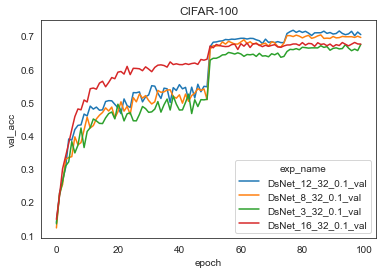

In [16]:
df4 = df3[df3["exp_name"].apply(lambda x: "32_0.1" in x)]
graph_training_logs("DsNet_", df4)

/var/folders/m2/659rrfsx63db1lpvyxrqtf9h0000gn/T/ipykernel_17222/3041442452.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["exp_name"] = df["exp_name"] + "_val"


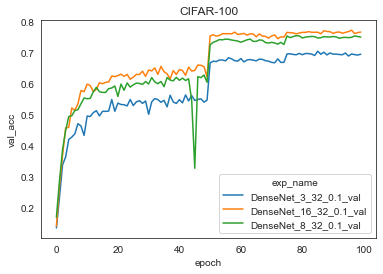

In [17]:
df4 = df3[df3["exp_name"].apply(lambda x: "32_0.1" in x)]
graph_training_logs("DenseNet", df4)